1.   Nama: Taufiq Qurohman Ruki
2.   Id Dicoding: Taufiq Qurohman Ruki
3.   Submission: Belajar Machine Learning untuk Pemula
4.   Event Beasiswa: IBM

Import Library dan Download data

In [19]:
# melakukan import library
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from sklearn.model_selection import train_test_split
import zipfile, os
import shutil

In [2]:
!wget --no-check-certificate \
  https://dicodingacademy.blob.core.windows.net/picodiploma/ml_pemula_academy/rockpaperscissors.zip \
  -O /tmp/rockpaperscissors.zip

--2020-11-05 00:50:21--  https://dicodingacademy.blob.core.windows.net/picodiploma/ml_pemula_academy/rockpaperscissors.zip
Resolving dicodingacademy.blob.core.windows.net (dicodingacademy.blob.core.windows.net)... 52.239.197.36
Connecting to dicodingacademy.blob.core.windows.net (dicodingacademy.blob.core.windows.net)|52.239.197.36|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 322873683 (308M) [application/zip]
Saving to: ‘/tmp/rockpaperscissors.zip’

/tmp/rockpapersciss 100%[===================>] 307.92M  7.67MB/s    in 58s     

2020-11-05 00:51:20 (5.32 MB/s) - ‘/tmp/rockpaperscissors.zip’ saved [322873683/322873683]



In [20]:
# melakukan ekstrak pada file zip
local_zip = '/tmp/rockpaperscissors.zip'
zip_ref = zipfile.ZipFile(local_zip, 'r')
zip_ref.extractall('/tmp')
zip_ref.close()

In [4]:
# Callback untuk menghentikan training setelah akurasi terpenuhi
class myCallback(tf.keras.callbacks.Callback):
  def on_epoch_end(self, epoch, logs={}):
    if(logs.get('accuracy')> 0.98):
      print("\nAkurasi telah mencapai 98%, hentikan training!")
      self.model.stop_training = True

callbacks = myCallback()

Membuat Direktori

In [5]:
# membuat direktori 
base_dir = '/tmp/rockpaperscissors'
train_dir = os.path.join(base_dir, 'train')
validation_dir = os.path.join(base_dir, 'val')

rock_dir = os.path.join(base_dir, 'rock')
paper_dir = os.path.join(base_dir, 'paper')
scissors_dir = os.path.join(base_dir, 'scissors')

In [6]:
if not os.path.exists(train_dir):

  os.mkdir(train_dir)

if not os.path.exists(validation_dir):

  os.mkdir(validation_dir)

Membuat Direktori dan Validation Set

In [21]:
# training direktori
train_rock = os.path.join(train_dir, 'rock')
train_paper = os.path.join(train_dir, 'paper')
train_scissors = os.path.join(train_dir, 'scissors')

# validation direktori
validation_rock = os.path.join(validation_dir, 'rock')
validation_paper = os.path.join(validation_dir, 'paper')
validation_scissors = os.path.join(validation_dir, 'scissors')

In [22]:
# membuat training direktori
if not os.path.exists(train_rock) :
  os.mkdir(train_rock)

if not os.path.exists(train_paper) :
  os.mkdir(train_paper)

if not os.path.exists(train_scissors) :
  os.mkdir(train_scissors)

# membuat validation direktori

if not os.path.exists(validation_rock) :
  os.mkdir(validation_rock)

if not os.path.exists(validation_paper) :
  os.mkdir(validation_paper)

if not os.path.exists(validation_scissors) :
  os.mkdir(validation_scissors)

Train dan test split

In [9]:
train_rock_dir, validation_rock_dir = train_test_split(os.listdir(rock_dir), test_size = 0.4)
train_paper_dir, validation_paper_dir = train_test_split(os.listdir(paper_dir), test_size = 0.4)
train_scissors_dir, validation_scissors_dir = train_test_split(os.listdir(scissors_dir), test_size = 0.4)

In [10]:
for file in train_rock_dir:
  shutil.copy(os.path.join(rock_dir, file), os.path.join(train_rock, file))
for file in train_paper_dir:
  shutil.copy(os.path.join(paper_dir,file), os.path.join(train_paper,file))
for file in train_scissors_dir:
  shutil.copy(os.path.join(scissors_dir,file), os.path.join(train_scissors,file))
for file in validation_rock_dir:
  shutil.copy(os.path.join(rock_dir, file), os.path.join(validation_rock,file))
for file in validation_paper_dir:
  shutil.copy(os.path.join(paper_dir,file), os.path.join(validation_paper,file))
for file in validation_scissors_dir:
  shutil.copy(os.path.join(scissors_dir,file), os.path.join(validation_scissors,file))

Augmentasi dan Generate Image data

In [11]:
train_datagen = ImageDataGenerator(
                    rescale=1./255,
                    rotation_range=20,
                    horizontal_flip=True,
                    shear_range=0.2,
                    fill_mode='nearest')

test_datagen = ImageDataGenerator(
                    rescale=1./255,
                    horizontal_flip=True,
                    shear_range=0.2,
                    fill_mode='nearest')

In [12]:
train_generator = test_datagen.flow_from_directory(
        train_dir,  
        target_size=(150, 150),
        batch_size= 32,
        class_mode='categorical')

validation_generator = test_datagen.flow_from_directory(
        validation_dir,
        target_size=(150, 150),
        batch_size= 32, 
        class_mode='categorical')

Found 1312 images belonging to 3 classes.
Found 876 images belonging to 3 classes.


In [13]:
# membuat model sequential
model = tf.keras.models.Sequential([
    tf.keras.layers.Conv2D(32, (3,3), activation='relu', input_shape=(150, 150, 3)),
    tf.keras.layers.MaxPooling2D(2, 2),
    tf.keras.layers.Conv2D(64, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Conv2D(128, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Conv2D(128, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(512, activation='relu'),
# menggunakan 'softmax' untuk klasifikasi 3 kelas
    tf.keras.layers.Dense(3, activation='softmax')
])

In [23]:
model.compile(optimizer=tf.optimizers.Adam(),
              loss='categorical_crossentropy',
              metrics=['accuracy'])

In [15]:
# latih model dengan model.fit
history = model.fit(
    train_generator,
    steps_per_epoch = 41, 
    epochs = 20,
    validation_data = validation_generator,
    validation_steps = 27, 
    verbose =2,
      callbacks=[callbacks]
)

Epoch 1/20
41/41 - 76s - loss: 1.0522 - accuracy: 0.4649 - val_loss: 0.7287 - val_accuracy: 0.6493
Epoch 2/20
41/41 - 75s - loss: 0.4298 - accuracy: 0.8338 - val_loss: 0.4211 - val_accuracy: 0.8692
Epoch 3/20
41/41 - 75s - loss: 0.2415 - accuracy: 0.9223 - val_loss: 0.2154 - val_accuracy: 0.9329
Epoch 4/20
41/41 - 75s - loss: 0.1506 - accuracy: 0.9611 - val_loss: 0.1984 - val_accuracy: 0.9363
Epoch 5/20
41/41 - 75s - loss: 0.1562 - accuracy: 0.9489 - val_loss: 0.1650 - val_accuracy: 0.9560
Epoch 6/20
41/41 - 75s - loss: 0.1045 - accuracy: 0.9657 - val_loss: 0.2223 - val_accuracy: 0.9468
Epoch 7/20
41/41 - 75s - loss: 0.1339 - accuracy: 0.9596 - val_loss: 0.1741 - val_accuracy: 0.9525
Epoch 8/20
41/41 - 75s - loss: 0.0763 - accuracy: 0.9748 - val_loss: 0.1941 - val_accuracy: 0.9525
Epoch 9/20

Akurasi telah mencapai 98%, hentikan training!
41/41 - 75s - loss: 0.0651 - accuracy: 0.9817 - val_loss: 0.1179 - val_accuracy: 0.9676


Grafik loss dan accuracy plot

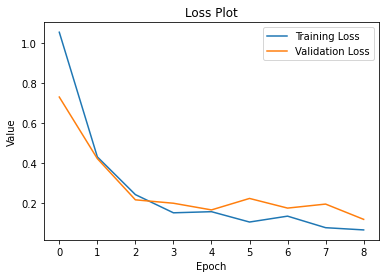

In [16]:
from matplotlib import pyplot as plt
#loss train & validation
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Loss Plot')
plt.ylabel('Value')
plt.xlabel('Epoch')
plt.legend(loc="upper right")
plt.show()

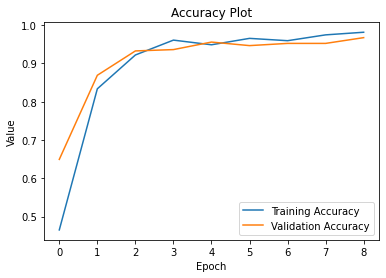

In [17]:
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Accuracy Plot')
plt.ylabel('Value')
plt.xlabel('Epoch')
plt.legend(loc="lower right")
plt.show()

Import Image untuk memprediksi gambar

Saving 2fxAdPTgrVIoITsL.png to 2fxAdPTgrVIoITsL.png
2fxAdPTgrVIoITsL.png
scissors


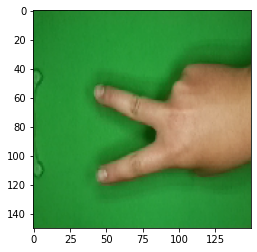

In [18]:
import numpy as np
from google.colab import files
from keras.preprocessing import image
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
%matplotlib inline

uploaded = files.upload()

for fn in uploaded.keys():

  path = fn 
  img = image.load_img(path, target_size =(150,150))
  imgplot = plt.imshow(img)
  x = image.img_to_array(img)
  x = np.expand_dims(x, axis=0)

  images = np.vstack([x])
  classes = model.predict(images, batch_size=10)

  print(fn)
  if classes[0,0]!=0:
    print('paper')
  elif classes[0,1]!=0:
    print('rock')
  else:
    print('scissors')